In [19]:
import pandas as pd

#for oversampling & undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Load data
selected_train = pd.read_csv('Data/selected_train.csv')
cleaned_train = pd.read_csv('Data/cleaned_train.csv')

In [21]:
print(selected_train.shape)
print(cleaned_train.shape)

(159571, 48)
(159571, 10)


In [22]:
#Concatenate clean_text column to selected_train dataset
selected_train = pd.concat([selected_train, cleaned_train['clean_text']], axis = 1)

In [49]:
def Oversample(df, cat):
    X_train = df.drop(cat, axis = 1)
    y_train = df[cat]

    ros = RandomOverSampler(random_state=0, sampling_strategy=0.5)
    X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

    # Check the number of records after over sampling
    print(X_train_ros.shape)
    print(sorted(Counter(y_train_ros).items()))

    #Concatenate X_train and y_train
    train_oversampled = pd.concat([X_train_ros,  y_train_ros], axis=1)
    return train_oversampled

In [53]:
cats = ['threat', 'identity_hate', 'severe_toxic', 'toxic']

train_oversampled = Oversample(selected_train, cats[0])
train_oversampled = Oversample(train_oversampled, cats[1])
train_oversampled = Oversample(train_oversampled, cats[2])

(238639, 48)
[(0, 159093), (1, 79546)]
(331663, 48)
[(0, 221109), (1, 110554)]
(421989, 48)
[(0, 281326), (1, 140663)]


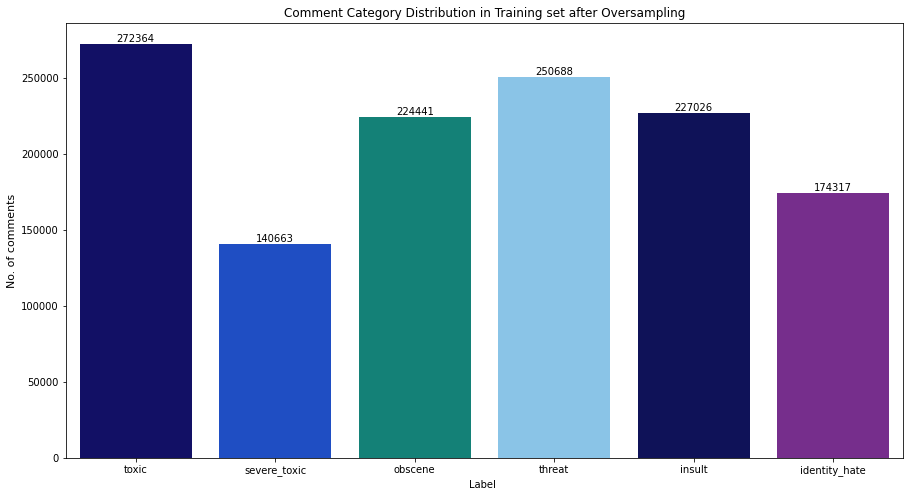

In [54]:
colors_ = ["deep blue","blue", "teal", "lightblue", "darkblue", "purple"]

palette= sns.xkcd_palette(colors_)

x = train_oversampled[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

plt.figure(figsize=(15,8))

ax= sns.barplot(x=x.index,y=x.values,palette=palette)
plt.title("Comment Category Distribution in Training set after Oversampling")
plt.xlabel('Label ')
plt.ylabel('No. of comments', fontsize=11)

patch = ax.patches
labels = x.values
for rect, label in zip(patch, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, va='bottom',ha='center')

plt.show()

In [55]:
train_oversampled.to_csv('Data/train_oversampled.csv', index=False)

## Logistic Regression & Random Forest

In [8]:
oversampled_train = pd.read_csv('Data/train_oversampled.csv')

In [9]:
print(oversampled_train.shape)
oversampled_train.head()

(421989, 49)


,toxic,obscene,insult,none,min_length_scaled,num_words_vs_length,exclamation_marks_vs_length,num_unique_words_scaled,verbs_vs_length,num_uppercase_scaled,...,139,143,156,157,170,198,clean_text,threat,identity_hate,severe_toxic
0,0,0,0,1,0.009393,0.181132,0.000000,0.106329,0.041509,0.003426,...,-0.109984,0.089084,0.012651,-0.019501,-0.091946,-0.113697,explanation why the edits made under my userna...,0,0,0
1,0,0,0,1,0.000723,0.160714,0.008929,0.043038,0.026786,0.001612,...,0.000094,0.021135,0.039308,-0.067295,-0.079366,-0.044959,d'aww! he matches this background colour i am ...,0,0,0
2,0,0,0,1,0.007225,0.188841,0.000000,0.091139,0.038627,0.000806,...,-0.146134,0.109907,0.036539,-0.053628,0.027530,-0.211230,"hey man, i am really not trying to edit war. i...",0,0,0
3,0,0,0,1,0.007948,0.175719,0.000000,0.141772,0.036741,0.002217,...,-0.214832,0.177560,0.007675,-0.087473,0.106848,-0.015987,""" more i cannot make any real suggestions on i...",0,0,0
4,0,0,0,1,0.003613,0.208955,0.000000,0.027848,0.059701,0.000403,...,-0.221076,0.163578,-0.068310,-0.031184,-0.017280,0.038566,"you, sir, are my hero. any chance you remember...",0,0,0


In [10]:
# logistic regression
classifier_over = MultiOutputClassifier(LogisticRegression(max_iter=10000))
# train
classifier_over.fit(oversampled_train[features], oversampled_train[labels])
# predict
predictions_over = classifier_over.predict(oversampled_train[features])

In [11]:
# predict probability
predictions_proba_log_ovr_over = classifier_over.predict_proba(oversampled_train[features])

In [16]:
# model evaluation overall score
get_overall_evaluation_score(oversampled_train[labels], predictions_over)

Accuracy score:  0.6146108073907139
Precision score:  0.9004191406353675
Recall score:  0.91221551936062
F1 score:  0.9061222418446149


In [18]:
# on test data
predictions_over_test = classifier_over.predict(selected_test[features])
# model evaluation overall score
get_overall_evaluation_score(selected_test[labels], predictions_over_test)

Accuracy score:  0.7821282315796055
Precision score:  0.3927793290075892
Recall score:  0.706028417712788
F1 score:  0.4965676475667567


The F1 score for test data using oversampled_train does not improve a lot comparing with using unsampled data (0.4407). In case of overfitting issue, we would not use oversampled_train in building logistic regression model.

In [78]:
# random forest
classifier_rf = RandomForestClassifier(random_state = 0,class_weight='balanced',n_estimators=100,max_depth = 15)
classifier_rf.fit(oversampled_train[features], oversampled_train[labels])
predictions_rf = classifier_rf.predict(oversampled_train[features])
# model evaluation overall score
get_overall_evaluation_score(oversampled_train[labels], predictions_rf)

Accuracy score:  0.9780563000457357
Precision score:  0.9983590890341083
Recall score:  0.9910507879416735
F1 score:  0.9946728284828051


The F1 score for test data using oversampled_train is obviously overfitted, hence we would not use oversampled_train in building random forest model.

## LGBM & Naive Bayes

In [10]:
oversampled_train = pd.read_csv('Data/train_oversampled.csv')

In [11]:
oversampled_train.head()

,toxic,obscene,insult,none,min_length_scaled,num_words_vs_length,exclamation_marks_vs_length,num_unique_words_scaled,verbs_vs_length,num_uppercase_scaled,...,139,143,156,157,170,198,clean_text,threat,identity_hate,severe_toxic
0,0,0,0,1,0.009393,0.181132,0.000000,0.106329,0.041509,0.003426,...,-0.109984,0.089084,0.012651,-0.019501,-0.091946,-0.113697,explanation why the edits made under my userna...,0,0,0
1,0,0,0,1,0.000723,0.160714,0.008929,0.043038,0.026786,0.001612,...,0.000094,0.021135,0.039308,-0.067295,-0.079366,-0.044959,d'aww! he matches this background colour i am ...,0,0,0
2,0,0,0,1,0.007225,0.188841,0.000000,0.091139,0.038627,0.000806,...,-0.146134,0.109907,0.036539,-0.053628,0.027530,-0.211230,"hey man, i am really not trying to edit war. i...",0,0,0
3,0,0,0,1,0.007948,0.175719,0.000000,0.141772,0.036741,0.002217,...,-0.214832,0.177560,0.007675,-0.087473,0.106848,-0.015987,""" more i cannot make any real suggestions on i...",0,0,0
4,0,0,0,1,0.003613,0.208955,0.000000,0.027848,0.059701,0.000403,...,-0.221076,0.163578,-0.068310,-0.031184,-0.017280,0.038566,"you, sir, are my hero. any chance you remember...",0,0,0


In [12]:
features = selected_train.columns[7:]
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### Baseline Gradient Boosting using Oversampled Data

In [88]:
over_classifier_gb = BinaryRelevance(LGBMClassifier(random_state=0))
# train
over_classifier_gb.fit(oversampled_train[features], oversampled_train[labels])
# predict
over_predictions_gb = over_classifier_gb.predict(oversampled_train[features])

In [89]:
# predict probability
over_predictions_proba_gb = over_classifier_gb.predict_proba(oversampled_train[features])

In [90]:
# model evaluation
get_evaluation_score(oversampled_train[labels], over_predictions_gb, over_predictions_proba_gb)

Accuracy score:  0.9578733094938494
Precision score:  0.9919831149778372
Recall score:  0.9885839384132907
F1 score:  0.9902750946771441
Confusion matrix for label toxic:
[[147310   2315]
 [  4777 267587]]
Confusion matrix for label severe_toxic:
[[280313   1013]
 [  1468 139195]]
Confusion matrix for label obscene:
[[195917   1631]
 [  2507 221934]]
Confusion matrix for label threat:
[[170088   1213]
 [     0 250688]]
Confusion matrix for label insult:
[[192575   2388]
 [  2966 224060]]
Confusion matrix for label identity_hate:
[[245938   1734]
 [  3003 171314]]
Logarithmic Loss:  4.899558893409421
ROC AUC score:  0.9992298287770203


In [91]:
# evaluation on test data
over_predictions_gb_test = over_classifier_gb.predict(selected_test[features])
over_predictions_proba_gb_test = over_classifier_gb.predict_proba(selected_test[features])
get_evaluation_score(selected_test[labels], over_predictions_gb_test, over_predictions_proba_gb_test)

Accuracy score:  0.8685485635687268
Precision score:  0.5403090661382476
Recall score:  0.7023037660366948
F1 score:  0.6079441038356306
Confusion matrix for label toxic:
[[54290  3598]
 [ 1436  4654]]
Confusion matrix for label severe_toxic:
[[63007   604]
 [  161   206]]
Confusion matrix for label obscene:
[[58444  1843]
 [ 1064  2627]]
Confusion matrix for label threat:
[[63196   571]
 [   82   129]]
Confusion matrix for label insult:
[[58778  1773]
 [ 1214  2213]]
Confusion matrix for label identity_hate:
[[62328   938]
 [  359   353]]
Logarithmic Loss:  0.3095174706208548
ROC AUC score:  0.9556650844067958


Oversampled Data - Improved performance on training set, but no improvement for testing set performance.

### Baseline Naive Bayes using Oversampled Data

In [92]:
import warnings
warnings.filterwarnings("ignore")

over_classifier_nb = BinaryRelevance(GaussianNB())
# train
over_classifier_nb.fit(oversampled_train[features], oversampled_train[labels])
# predict
over_predictions_nb = over_classifier_nb.predict(oversampled_train[features])

In [93]:
# predict probability
over_predictions_proba_nb = over_classifier_nb.predict_proba(oversampled_train[features])

In [94]:
# model evaluation
get_evaluation_score(oversampled_train[labels], over_predictions_nb, over_predictions_proba_nb)

Accuracy score:  0.5251582387218624
Precision score:  0.8769532316152626
Recall score:  0.7752468206644596
F1 score:  0.8222164811156505
Confusion matrix for label toxic:
[[145825   3800]
 [ 31174 241190]]
Confusion matrix for label severe_toxic:
[[243264  38062]
 [ 41921  98742]]
Confusion matrix for label obscene:
[[179992  17556]
 [ 45563 178878]]
Confusion matrix for label threat:
[[155518  15783]
 [ 66285 184403]]
Confusion matrix for label insult:
[[176488  18475]
 [ 45375 181651]]
Confusion matrix for label identity_hate:
[[195410  52262]
 [ 59501 114816]]
Logarithmic Loss:  8.847738013874869
ROC AUC score:  0.9260561377095832


In [95]:
# evaluation on test data
over_predictions_nb_test = over_classifier_nb.predict(selected_test[features])
over_predictions_proba_nb_test = over_classifier_nb.predict_proba(selected_test[features])
get_evaluation_score(selected_test[labels], over_predictions_nb_test, over_predictions_proba_nb_test)

Accuracy score:  0.8530588639844947
Precision score:  0.4968336364510059
Recall score:  0.6409159884121948
F1 score:  0.5472951002536629
Confusion matrix for label toxic:
[[54362  3526]
 [ 1736  4354]]
Confusion matrix for label severe_toxic:
[[61457  2154]
 [  115   252]]
Confusion matrix for label obscene:
[[58460  1827]
 [ 1551  2140]]
Confusion matrix for label threat:
[[59676  4091]
 [   55   156]]
Confusion matrix for label insult:
[[58530  2021]
 [ 1443  1984]]
Confusion matrix for label identity_hate:
[[60870  2396]
 [  306   406]]
Logarithmic Loss:  1.0061376129750363
ROC AUC score:  0.9288408883514321


Oversampled Data - Improved performance on test set, but worse score for training set performance.

## XGBoost

In [164]:
oversampled_train = pd.read_csv('Data/train_oversampled.csv')

In [165]:
print(oversampled_train.shape)
oversampled_train.head()

(421989, 49)


,toxic,obscene,insult,none,min_length_scaled,num_words_vs_length,exclamation_marks_vs_length,num_unique_words_scaled,verbs_vs_length,num_uppercase_scaled,...,139,143,156,157,170,198,clean_text,threat,identity_hate,severe_toxic
0,0,0,0,1,0.009393,0.181132,0.000000,0.106329,0.041509,0.003426,...,-0.109984,0.089084,0.012651,-0.019501,-0.091946,-0.113697,explanation why the edits made under my userna...,0,0,0
1,0,0,0,1,0.000723,0.160714,0.008929,0.043038,0.026786,0.001612,...,0.000094,0.021135,0.039308,-0.067295,-0.079366,-0.044959,d'aww! he matches this background colour i am ...,0,0,0
2,0,0,0,1,0.007225,0.188841,0.000000,0.091139,0.038627,0.000806,...,-0.146134,0.109907,0.036539,-0.053628,0.027530,-0.211230,"hey man, i am really not trying to edit war. i...",0,0,0
3,0,0,0,1,0.007948,0.175719,0.000000,0.141772,0.036741,0.002217,...,-0.214832,0.177560,0.007675,-0.087473,0.106848,-0.015987,""" more i cannot make any real suggestions on i...",0,0,0
4,0,0,0,1,0.003613,0.208955,0.000000,0.027848,0.059701,0.000403,...,-0.221076,0.163578,-0.068310,-0.031184,-0.017280,0.038566,"you, sir, are my hero. any chance you remember...",0,0,0


In [4]:
features = selected_train.columns[7:]
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### Baseline XGboost using Oversampled Data

In [167]:
classifier_over = BinaryRelevance(XGBClassifier(random_state=0))
# train
classifier_over.fit(oversampled_train[features], oversampled_train[labels])
# predict
predictions_over = classifier_over.predict(oversampled_train[features])

In [168]:
# predict probability
predictions_proba_over = classifier_over.predict_proba(oversampled_train[features])

In [169]:
# model evaluation
get_evaluation_score(oversampled_train[labels], predictions_over, predictions_proba_over)

Accuracy score:  0.9816369621009079
Precision score:  0.9976503470444362
Recall score:  0.9948778556633235
F1 score:  0.9962594671338085
Confusion matrix for label toxic:
[[148545   1080]
 [  3434 268930]]
Confusion matrix for label severe_toxic:
[[281192    134]
 [   158 140505]]
Confusion matrix for label obscene:
[[196894    654]
 [  1245 223196]]
Confusion matrix for label threat:
[[171289     12]
 [     0 250688]]
Confusion matrix for label insult:
[[194034    929]
 [  1601 225425]]
Confusion matrix for label identity_hate:
[[247465    207]
 [   167 174150]]
Logarithmic Loss:  4.867162926431723
ROC AUC score:  0.9997509309201982


In [170]:
# evaluation on test data
predictions_over_test = classifier_over.predict(selected_test[features])
predictions_proba_over_test = classifier_over.predict_proba(selected_test[features])
get_evaluation_score(selected_test[labels], predictions_over_test, predictions_proba_over_test)

Accuracy score:  0.8719090937509769
Precision score:  0.5578638439034245
Recall score:  0.6776107049248172
F1 score:  0.6099251686299402
Confusion matrix for label toxic:
[[54383  3505]
 [ 1449  4641]]
Confusion matrix for label severe_toxic:
[[63206   405]
 [  218   149]]
Confusion matrix for label obscene:
[[58483  1804]
 [ 1093  2598]]
Confusion matrix for label threat:
[[63655   112]
 [  132    79]]
Confusion matrix for label insult:
[[58987  1564]
 [ 1303  2124]]
Confusion matrix for label identity_hate:
[[62907   359]
 [  479   233]]
Logarithmic Loss:  0.3176202046462899
ROC AUC score:  0.9531835703680447


Improved performance on training set, but no improvement for testing set performance.

# Baseline LSTM

The oversampled data perform not well in LSTM model

In [61]:
oversampled_data = pd.read_csv("./Data/train_oversampled.csv")

In [63]:

train_y = oversampled_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values
train_x = oversampled_data['clean_text']

# Vectorize text + Prepare GloVe Embedding
tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(train_x))

train_x = tokenizer.texts_to_sequences(train_x)
train_x = pad_sequences(train_x, maxlen=maxlen)


In [64]:
embed_size = 128
inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size)(inp)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model_baseline_oversampled = Model(inputs=inp, outputs=x)
model_baseline_oversampled .compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_baseline_oversampled.fit(train_x,train_y, batch_size=32, epochs=2, validation_split=0.1)

2023-03-28 13:55:48.267007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-28 13:55:48.270407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-28 13:55:48.272085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/2


2023-03-28 13:55:49.328185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-28 13:55:49.329741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-28 13:55:49.332427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11869/11869 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.8754

2023-03-28 14:07:12.279982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-28 14:07:12.281573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-28 14:07:12.283028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11869/11869 [==============================] - 699s 59ms/step - loss: 0.0480 - accuracy: 0.8754 - val_loss: 0.0128 - val_accuracy: 0.9695
Epoch 2/2
11869/11869 [==============================] - 2135s 180ms/step - loss: 0.0227 - accuracy: 0.9408 - val_loss: 0.0111 - val_accuracy: 0.9730


In [73]:
y_pred_baseline_oversampled_prob = model_baseline_oversampled.predict(test_x, batch_size=1024, verbose=1)
y_pred_baseline_oversampled= multi_label(y_pred_baseline_oversampled_prob)
get_evaluation_score(test_y, y_pred_baseline_oversampled,y_pred_baseline_oversampled_prob)

Accuracy score:  0.15424052017881146
Precision score:  0.05558650586003321
Recall score:  0.5552489998620499
F1 score:  0.10074835475292736
Logarithmic Loss:  0.4906917475329344
ROC AUC score:  0.3709438143484407
